In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset_path = 'auto-mpg.csv'
df = pd.read_csv(dataset_path, na_values='?', comment='\t', sep=',')

#df = pd.read_csv(dataset_path)
df = df.drop(columns='car name')
print(df.shape)
df.tail()

(398, 8)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
393,27.0,4,140.0,86.0,2790,15.6,82,1
394,44.0,4,97.0,52.0,2130,24.6,82,2
395,32.0,4,135.0,84.0,2295,11.6,82,1
396,28.0,4,120.0,79.0,2625,18.6,82,1
397,31.0,4,119.0,82.0,2720,19.4,82,1


mpg를 타겟변수로 삼는다.

In [3]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [4]:
numeric_column_names = [
            'cylinders',
            'displacement',
            'horsepower',
            'weight',
            'acceleration',
            ]
df = df.dropna()
df = df.reset_index(drop=True)

In [5]:
import sklearn
import sklearn.model_selection

df_train, df_test = sklearn.model_selection.train_test_split(df , train_size=0.8)
train_stats = df_train.describe().transpose()
train_stats 

,count,mean,std,min,25%,50%,75%,max
mpg,313.0,23.327157,7.714530,10.0,17.5,22.5,29.0,46.6
cylinders,313.0,5.488818,1.708023,3.0,4.0,4.0,8.0,8.0
displacement,313.0,194.730032,105.858554,68.0,98.0,151.0,267.0,455.0
horsepower,313.0,104.536741,38.945056,46.0,75.0,95.0,125.0,230.0
weight,313.0,2982.268371,858.332420,1613.0,2245.0,2800.0,3620.0,5140.0
acceleration,313.0,15.563259,2.789269,8.0,13.9,15.5,17.2,24.8
model year,313.0,75.849840,3.692483,70.0,73.0,76.0,79.0,82.0
origin,313.0,1.597444,0.819001,1.0,1.0,1.0,2.0,3.0


In [6]:
df_train_norm, df_test_norm = df_train.copy(), df_test.copy()
for col in numeric_column_names:
    mean = train_stats.loc[col, 'mean']
    std = train_stats.loc[col, 'std']
    df_train_norm.loc[:, col] = (df_train_norm.loc[:, col] - mean) / std
    df_test_norm.loc[:, col] = (df_test_norm.loc[:, col] - mean) / std
df_train_norm

/var/folders/6q/q927ypwn4ll9d4rvjq9gl1qw0000gn/T/ipykernel_65144/1299125293.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.29928292 -0.87166151 -0.87166151  0.29928292 -0.28618929  0.29928292
 -0.87166151 -0.87166151 -0.87166151 -0.87166151  1.47022735  1.47022735
  0.29928292  0.29928292 -0.87166151  0.29928292  0.29928292  1.47022735
 -0.87166151 -0.87166151  1.47022735 -0.87166151  0.29928292 -0.87166151
 -0.87166151 -0.87166151  0.29928292 -0.87166151 -0.87166151  0.29928292
 -0.87166151  0.29928292 -0.87166151  0.29928292  0.29928292  0.29928292
  1.47022735  1.47022735 -0.87166151 -0.87166151 -0.87166151  0.29928292
 -0.87166151 -0.87166151  0.29928292 -0.87166151  0.29928292 -0.87166151
  1.47022735  0.29928292  0.29928292  1.47022735 -0.87166151  1.47022735
 -0.87166151  0.29928292 -0.87166151  1.47022735  1.47022735  1.47022735
 -0.87166151  0.29928292 -0.87166151 -0.87166151 -0.87166151  0.299282

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
239,22.0,0.299283,-0.460332,-0.193522,-0.194876,-0.381196,77,3
117,24.0,-0.871662,-0.743729,-0.758421,-0.960314,-0.022679,73,2
342,32.3,-0.871662,-0.923213,-0.963838,-1.068663,0.801909,81,3
33,16.0,0.299283,0.285947,0.011895,0.532115,-0.022679,71,1
295,25.4,-0.286189,-0.110809,-0.707066,0.638135,1.626498,79,2
...,...,...,...,...,...,...,...,...
42,13.0,1.470227,1.939097,1.680913,2.054835,-1.277488,71,1
238,30.5,-0.871662,-0.923213,-0.681389,-0.923032,-0.524603,77,2
219,17.5,1.470227,1.041673,1.038983,1.045902,-1.098230,77,1
67,13.0,1.470227,1.466768,1.295755,1.770563,-0.739713,72,1


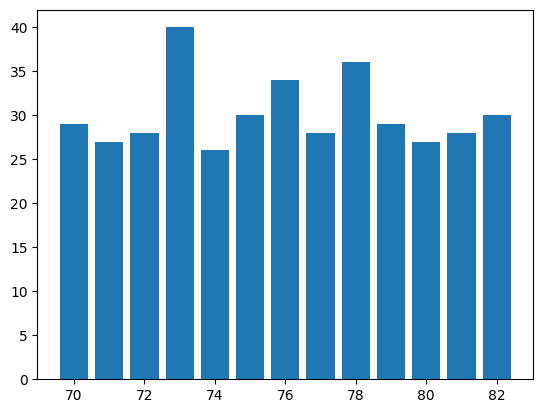

In [7]:

df_model_year_count = df['model year'].value_counts()
plt.bar(df_model_year_count.index, df_model_year_count.values)
plt.show()

**텐서플로우로 범주형 특성을 열을 만드는 방법**

model year 정보를 그룹으로 묶어서 버킷으로 나눌것이다. 


버킷리스트
- 0 : model year < 73
- 1 : 73 <= model year < 76
- 2 : 76 <= model year < 79
- 3 : model year >= 79

In [8]:
numeric_features = []
for col in numeric_column_names:
    numeric_features.append(tf.feature_column.numeric_column(key=col))

for f in numeric_features:
    print(f)

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.
NumericColumn(key='cylinders', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)
NumericColumn(key='displacement', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)
NumericColumn(key='horsepower', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)
NumericColumn(key='weight', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)
NumericColumn(key='acceleration', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)


In [9]:
featured_year = tf.feature_column.numeric_column(key='ModelYear')
buketized_features = []
buketized_features.append(
    tf.feature_column.bucketized_column(
        source_column=featured_year,
        boundaries=[73, 76, 79]
    )
)

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


In [10]:
# origin 특성리스트는 0, 1, 2가 아니라 1, 2, 3으로 돼야함으로 특성열을 직접생성
feature_origin = tf.feature_column.categorical_column_with_vocabulary_list(
    key='Origin',
    vocabulary_list=[1, 2, 3])

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


**텐서플로우로 특성 열을 밀집 열로 바꾸기**

범주 특성 열을 밀집 열로 바꾼느 과정이다.
인디케이터 열을 범주형 열을 원-핫 인코딩 열로 바꾼다, ex (1, 2, 3) -> ([0,0,1], [0,1,0], [1,0,0])
임베딩 열은 각 인덱스를 float타입의 랜덤한 수치 벡터로 매핑한다. (이 수치벡터는 훈련될수 있다.)

범주 개수가 많을때에는 적은 차원의 임베딩 열을 사용하여 성능을 높일수 있다.

In [11]:
# 인디케이터를 이용해서 범주형 열을 -> 밀집 열로 바꾸었다.
categorical_indicator_features = []
categorical_indicator_features.append(
    tf.feature_column.indicator_column(feature_origin))

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


In [12]:
print(numeric_features)                 # 일반적인 연속적인 실수 수치 (정규화 됨)
print(buketized_features)               # model year 73, 76, 79 를 기준으로 버킷나눔
print(categorical_indicator_features)   # origin (1, 2, 3) -> ([0,0,1], [0,1,0], [1,0,0]

[NumericColumn(key='cylinders', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='displacement', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='horsepower', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='weight', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='acceleration', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]
[BucketizedColumn(source_column=NumericColumn(key='ModelYear', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(73, 76, 79))]
[IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='Origin', vocabulary_list=(1, 2, 3), dtype=tf.int64, default_value=-1, num_oov_buckets=0))]


**사전에 준비된 추정기로 머신러닝 수행**

*추정기 사용 단계*
- 1. 데이터 로드를 위해 입력 함수 정의
- 2. 데이터셋을 특성 열로 변환
- 3. 추정기 객체를 만들기
- 4. 추정기의 train(), evalute(), predict()메서드를 이용해서 필요한 동작수행

In [13]:
# 1. 데이터 로드를 위해 입력 함수 정의
def train_input_fn(df_train, batch_size=8):
    df = df_train.copy()
    train_x, train_y = df, df.pop('mpg')
    dataset = tf.data.Dataset.from_tensor_slices(
        (dict(train_x), train_y)
    )
    return dataset.shuffle(1000).repeat().batch(batch_size)

In [14]:
df_train_norm

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
239,22.0,0.299283,-0.460332,-0.193522,-0.194876,-0.381196,77,3
117,24.0,-0.871662,-0.743729,-0.758421,-0.960314,-0.022679,73,2
342,32.3,-0.871662,-0.923213,-0.963838,-1.068663,0.801909,81,3
33,16.0,0.299283,0.285947,0.011895,0.532115,-0.022679,71,1
295,25.4,-0.286189,-0.110809,-0.707066,0.638135,1.626498,79,2
...,...,...,...,...,...,...,...,...
42,13.0,1.470227,1.939097,1.680913,2.054835,-1.277488,71,1
238,30.5,-0.871662,-0.923213,-0.681389,-0.923032,-0.524603,77,2
219,17.5,1.470227,1.041673,1.038983,1.045902,-1.098230,77,1
67,13.0,1.470227,1.466768,1.295755,1.770563,-0.739713,72,1


In [15]:
ds = train_input_fn(df_train_norm)
batch = next(iter(ds))
print('Keys:',batch[0].keys())
print('Model year:',batch[0]['model year'])

Keys: dict_keys(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin'])
Model year: tf.Tensor([77 80 74 78 77 81 75 81], shape=(8,), dtype=int64)


In [16]:
def eval_input_fn(df_test, batch_size=8):
    df = df_test.copy()
    test_x. test_y = df, df.pop['mpg']
    dataset = tf.data.Dataset.from_tensor_slices(dict(test_x), test_y)
    return dataset.batch(batch_size)

In [17]:
feature_columns = (
    numeric_features,
    buketized_features,
    categorical_indicator_features
)

In [18]:
regressor = tf.estimator.DNNClassifier(
    feature_columns=all_feature_columns,
    hidden_units=[32, 10],
    model_dir='models/autompg-dnnregressor/'
)

AttributeError: module 'tensorflow' has no attribute 'estimator'

In [ ]:
EPOHS = 1000
BATCH_SIZE = 8
total_steps = EPOHS * int(np.ceil(len(df_train)/BATCH_SIZE))
print('훈련 스텝:', total_steps)

regressor.train(
    input_fn=lambda:train_input_fn(df_train_norm, batch_size=BATCH_SIZE),
    steps=total_steps)

훈련 스텝: 40000
INFO:tensorflow:Calling model_fn.


ValueError: Received a feature column from TensorFlow v1, but this is a TensorFlow v2 Estimator. Please either use v2 feature columns (accessible via tf.feature_column.* in TF 2.x) with this Estimator, or switch to a v1 Estimator for use with v1 feature columns (accessible via tf.compat.v1.estimator.* and tf.compat.v1.feature_column.*, respectively.